<a href="https://colab.research.google.com/github/PaschalHendryawan/Pengolahan_Citra_Digital/blob/main/PCD_Warna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounted at /content/gdrive
Gambar asli:


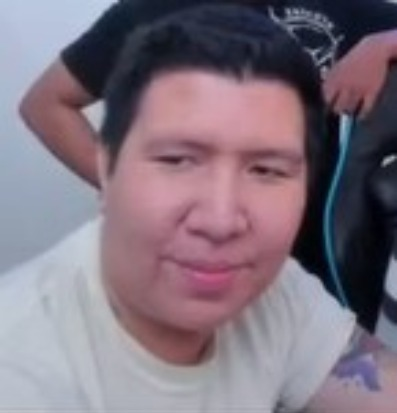

In [1]:
from google.colab import drive
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Menghubungkan Colab dengan Google Drive
drive.mount('/content/gdrive')

def change_intensity(image, alpha):
    # Mengubah intensitas dengan faktor alpha
    result = cv2.convertScaleAbs(image, alpha=alpha, beta=0)
    return result

def change_hue(image, hue_factor):
    # Konversi gambar dari BGR ke HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Mengubah hue dengan faktor yang diberikan
    hsv_image[:,:,0] = np.mod(hsv_image[:,:,0] + hue_factor, 180)

    # Konversi kembali ke BGR
    result = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return result

def change_saturation(image, saturation_factor):
    # Konversi gambar dari BGR ke HSV
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Mengubah saturasi dengan faktor yang diberikan
    hsv_image[:,:,1] = np.clip(saturation_factor * hsv_image[:,:,1], 0, 255)

    # Konversi kembali ke BGR
    result = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2BGR)
    return result

# Ganti path gambar di Google Drive sesuai struktur direktori Anda
image_path = '/content/gdrive/MyDrive/PCD/Windah_Basudara_20_Jan_2021.jpg'

# Baca gambar
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
    # Tampilkan gambar asli
print("Gambar asli:")
cv2_imshow(image)



Gambar setelah mengubah intensitas pertama kali (alpha=0.5):


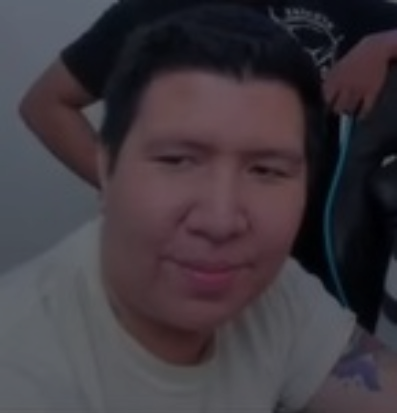

Gambar setelah mengubah intensitas kedua kali (alpha=3):


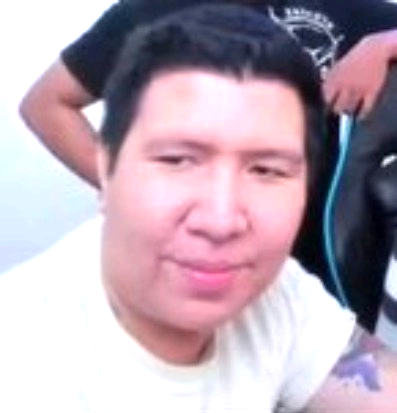

In [2]:
# Mengubah intensitas pertama kali
alpha_1 = 0.5  # Ganti dengan faktor yang diinginkan
intensity_changed_1 = change_intensity(image, alpha_1)
print(f"Gambar setelah mengubah intensitas pertama kali (alpha={alpha_1}):")
cv2_imshow(intensity_changed_1)

# Mengubah intensitas kedua kali
alpha_2 = 3  # Ganti dengan faktor yang diinginkan
intensity_changed_2 = change_intensity(intensity_changed_1, alpha_2)
print(f"Gambar setelah mengubah intensitas kedua kali (alpha={alpha_2}):")
cv2_imshow(intensity_changed_2)

Gambar setelah mengubah hue pertama kali (hue_factor=-10):


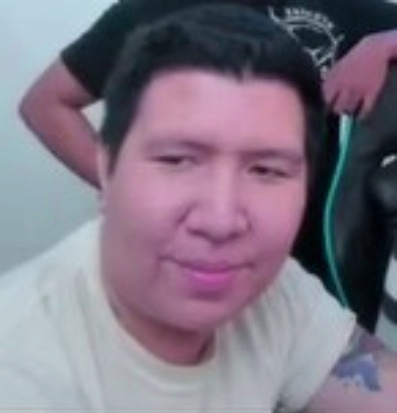

Gambar setelah mengubah hue kedua kali (hue_factor=30):


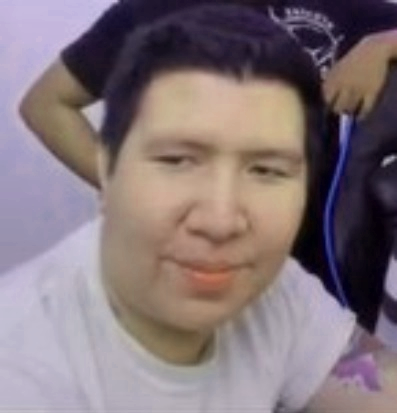

In [3]:
# Mengubah hue pertama kali
hue_factor_1 = -10  # Ganti dengan faktor yang diinginkan
hue_changed_1 = change_hue(image, hue_factor_1)
print(f"Gambar setelah mengubah hue pertama kali (hue_factor={hue_factor_1}):")
cv2_imshow(hue_changed_1)

# Mengubah hue kedua kali
hue_factor_2 = 30  # Ganti dengan faktor yang diinginkan
hue_changed_2 = change_hue(hue_changed_1, hue_factor_2)
print(f"Gambar setelah mengubah hue kedua kali (hue_factor={hue_factor_2}):")
cv2_imshow(hue_changed_2)

Gambar setelah mengubah saturasi pertama kali (saturation_factor=0.1):


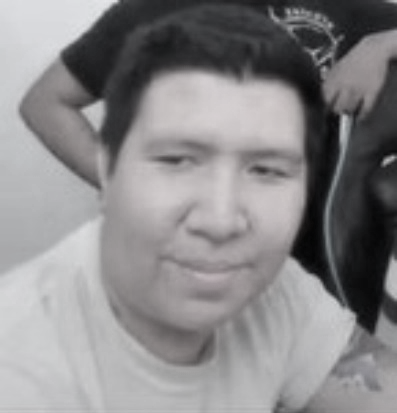

Gambar setelah mengubah saturasi kedua kali (saturation_factor=15.0):


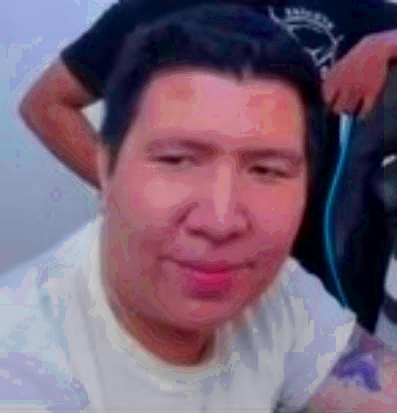

In [4]:
# Mengubah saturasi pertama kali
saturation_factor_1 = 0.1  # Ganti dengan faktor yang diinginkan
saturation_changed_1 = change_saturation(image, saturation_factor_1)
print(f"Gambar setelah mengubah saturasi pertama kali (saturation_factor={saturation_factor_1}):")
cv2_imshow(saturation_changed_1)

# Mengubah saturasi kedua kali
saturation_factor_2 = 15.0  # Ganti dengan faktor yang diinginkan
saturation_changed_2 = change_saturation(saturation_changed_1, saturation_factor_2)
print(f"Gambar setelah mengubah saturasi kedua kali (saturation_factor={saturation_factor_2}):")
cv2_imshow(saturation_changed_2)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


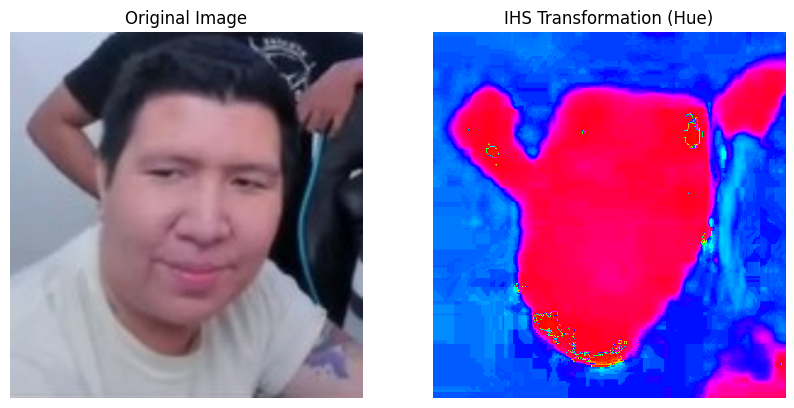

In [18]:
from PIL import Image
import numpy as np

# Mount Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

# Define the image path
image_path = '/content/gdrive/MyDrive/PCD/Windah_Basudara_20_Jan_2021.jpg'

# Load the image
image = Image.open(image_path)

# Convert the image to a NumPy array
img_array = np.array(image)

# Normalize pixel values to be between 0 and 1
img_array_normalized = img_array / 255.0

# RGB to IHS transformation function
def rgb_to_ihs(rgb):
    # Extract RGB channels
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]

    # Calculate Intensity (I)
    intensity = 0.299 * r + 0.587 * g + 0.114 * b

    # Calculate Hue (H)
    hue = np.arctan2(np.sqrt(3) * (g - b), 2 * r - g - b)

    # Calculate Saturation (S)
    saturation = np.sqrt((r - intensity)**2 + (g - intensity)**2 + (b - intensity)**2)

    # Normalize Hue to the range [0, 2*pi]
    hue[hue < 0] += 2 * np.pi

    return np.stack([intensity, hue, saturation], axis=-1)

# Apply RGB to IHS transformation
ihs_image = rgb_to_ihs(img_array_normalized)

# Display the original and transformed images
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(img_array)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ihs_image[:, :, 1], cmap='hsv', vmin=0, vmax=2 * np.pi)
plt.title('IHS Transformation (Hue)')
plt.axis('off')

plt.show()
